In [54]:

import pandas as pd
import sql as sql
import numpy as np
import seaborn as sns
import missingno as msno

pd.set_option("display.max_colwidth",500)
pd.set_option("display.max_rows",500)

from pandasql import sqldf
psql = lambda q: sqldf(q, globals())

In [10]:
df=pd.read_csv("Cheapestelectriccars-EVDatabase.csv") #bring data from local.

In [11]:
df.shape # #Ofcolumns and rows.

(180, 11)

In [12]:
df.head() #Default first 5 data is coming.

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             180 non-null    object
 1   Subtitle         180 non-null    object
 2   Acceleration     180 non-null    object
 3   TopSpeed         180 non-null    object
 4   Range            180 non-null    object
 5   Efficiency       180 non-null    object
 6   FastChargeSpeed  180 non-null    object
 7   Drive            180 non-null    object
 8   NumberofSeats    180 non-null    int64 
 9   PriceinGermany   168 non-null    object
 10  PriceinUK        136 non-null    object
dtypes: int64(1), object(10)
memory usage: 15.6+ KB


In [14]:
df.Name.nunique() # Total unique value

174

In [15]:
df['UID'] = df['Name'] + df['Subtitle']The values in the "UID" #column are obtained by concatenating the corresponding values from the "Name" and "Subtitle" columns.
len(df['UID'].unique()) # It returns the count of distinct combinations of "Name" and "Subtitle" in the DataFrame df.

175

In [16]:
df.UID.value_counts() #The code df.UID.value_counts() calculates the frequency count of each unique value in the "UID" column of the DataFrame df.

Hyundai Kona Electric 39 kWhBattery Electric Vehicle |       39.2 kWh             2
Hyundai Kona Electric 64 kWhBattery Electric Vehicle |       64 kWh               2
Audi e-tron Sportback 55 quattroBattery Electric Vehicle |       86.5 kWh         2
Audi e-tron 55 quattroBattery Electric Vehicle |       86.5 kWh                   2
Kia e-Soul 64 kWhBattery Electric Vehicle |       64 kWh                          2
Peugeot e-Traveller Standard 75 kWhBattery Electric Vehicle |       68 kWh        1
Peugeot e-Traveller Long 75 kWhBattery Electric Vehicle |       68 kWh            1
Seres 3 Battery Electric Vehicle |       52 kWh                                   1
Hyundai IONIQ 5 Project 45Battery Electric Vehicle |       72.6 kWh               1
Porsche Taycan Battery Electric Vehicle |       71 kWh                            1
Porsche Taycan PlusBattery Electric Vehicle |       83.7 kWh                      1
Tesla Model S Long RangeBattery Electric Vehicle |       90 kWh             

In [27]:
df[df.UID.isin(['Hyundai Kona Electric 64 kWhBattery Electric Vehicle |       64 kWh',
                'Audi e-tron 55 quattroBattery Electric Vehicle |       86.5 kWh'
               ,'Kia e-Soul 64 kWhBattery Electric Vehicle |       64 kWh'
               ,'Audi e-tron Sportback 55 quattroBattery Electric Vehicle |       86.5 kWh'
               ])].sort_values(by='Name') # we use filter where the uid value matches any of the specified values in the lists then it sorts the resulting DataFrame by the 'Name' column.

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,UID
62,Audi e-tron 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,365 km,237 Wh/km,590 km/h,All Wheel Drive,5,NaN,"£71,500",Audi e-tron 55 quattroBattery Electric Vehicle | 86.5 kWh
117,Audi e-tron 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,365 km,237 Wh/km,590 km/h,All Wheel Drive,5,"€81,500",NaN,Audi e-tron 55 quattroBattery Electric Vehicle | 86.5 kWh
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900",Audi e-tron Sportback 55 quattroBattery Electric Vehicle | 86.5 kWh
118,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,"€83,750",NaN,Audi e-tron Sportback 55 quattroBattery Electric Vehicle | 86.5 kWh
34,Hyundai Kona Electric 64 kWh,Battery Electric Vehicle | 64 kWh,7.9 sec,167 km/h,395 km,162 Wh/km,370 km/h,Front Wheel Drive,5,"€41,850",NaN,Hyundai Kona Electric 64 kWhBattery Electric Vehicle | 64 kWh
133,Hyundai Kona Electric 64 kWh,Battery Electric Vehicle | 64 kWh,7.9 sec,167 km/h,395 km,162 Wh/km,370 km/h,Front Wheel Drive,5,"€41,850","£32,550",Hyundai Kona Electric 64 kWhBattery Electric Vehicle | 64 kWh
15,Kia e-Soul 64 kWh,Battery Electric Vehicle | 64 kWh,7.9 sec,167 km/h,370 km,173 Wh/km,350 km/h,Front Wheel Drive,5,NaN,"£37,545",Kia e-Soul 64 kWhBattery Electric Vehicle | 64 kWh
78,Kia e-Soul 64 kWh,Battery Electric Vehicle | 64 kWh,7.9 sec,167 km/h,370 km,173 Wh/km,350 km/h,Front Wheel Drive,5,"€37,790",NaN,Kia e-Soul 64 kWhBattery Electric Vehicle | 64 kWh


In [63]:
df['PriceinUK']= df['PriceinUK'].astype(str)
df['PriceinGermany']= df['PriceinGermany'].astype(str)

In [65]:
df['PriceinUK'] = df['PriceinUK'].str.split('£').str[0].str.replace(',','')
df['PriceinGermany']= df['PriceinGermany'].str.split('€').str[0].replace(',','')

In [66]:
df=psql("""
            Select UID, Name, Subtitle, Acceleration, TopSpeed,
            Range, Efficiency, "FastChargeSpeed", Drive,
            NumberofSeats, max(cast(PriceinGermany as int)) as PriceinGermany,
            max(cast(PriceinUK as int)) as PriceinUK
            from df
            group by 1,2,3,4,5,6,7,8,9,10
    """)

In [67]:
df[df.UID.isin(['Hyundai Kona Electric 64 kWhBattery Electric Vehicle |       64 kWh',
                'Audi e-tron 55 quattroBattery Electric Vehicle |       86.5 kWh'
               ,'Kia e-Soul 64 kWhBattery Electric Vehicle |       64 kWh'
               ,'Audi e-tron Sportback 55 quattroBattery Electric Vehicle |       86.5 kWh'
               ])].sort_values(by='Name')

,UID,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
9,Audi e-tron 55 quattroBattery Electric Vehicle | 86.5 kWh,Audi e-tron 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,365 km,237 Wh/km,590 km/h,All Wheel Drive,5,81500,71500
15,Audi e-tron Sportback 55 quattroBattery Electric Vehicle | 86.5 kWh,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,83750,79900
56,Hyundai Kona Electric 64 kWhBattery Electric Vehicle | 64 kWh,Hyundai Kona Electric 64 kWh,Battery Electric Vehicle | 64 kWh,7.9 sec,167 km/h,395 km,162 Wh/km,370 km/h,Front Wheel Drive,5,41850,32550
66,Kia e-Soul 64 kWhBattery Electric Vehicle | 64 kWh,Kia e-Soul 64 kWh,Battery Electric Vehicle | 64 kWh,7.9 sec,167 km/h,370 km,173 Wh/km,350 km/h,Front Wheel Drive,5,37790,37545


In [68]:
df.Drive.unique()


array(['Front Wheel Drive', 'Rear Wheel Drive', 'All Wheel Drive'],
      dtype=object)

In [69]:
df.FastChargeSpeed.unique()

array(['350 km/h', '410 km/h', '520 km/h', '490 km/h', '390 km/h',
       '500 km/h', '470 km/h', '590 km/h', '810 km/h', '840 km/h',
       '510 km/h', '540 km/h', '600 km/h', '270 km/h', '260 km/h',
       '630 km/h', '660 km/h', '620 km/h', '420 km/h', '480 km/h',
       '460 km/h', '440 km/h', '430 km/h', '550 km/h', '330 km/h',
       '250 km/h', '290 km/h', '240 km/h', '120 km/h', '400 km/h',
       '360 km/h', '380 km/h', '190 km/h', '890 km/h', '870 km/h',
       '860 km/h', '720 km/h', '710 km/h', '220 km/h', '210 km/h',
       '370 km/h', '160 km/h', '340 km/h', '920 km/h', '980 km/h',
       '950 km/h', '740 km/h', '230 km/h', '150 km/h', '1380 km/h',
       '1410 km/h', '1390 km/h', '180 km/h', '800 km/h', '280 km/h',
       '450 km/h', '530 km/h', '170 km/h', '850 km/h', '910 km/h',
       '750 km/h', '790 km/h', '960 km/h', '-', '310 km/h', '570 km/h',
       '820 km/h', '680 km/h', '830 km/h'], dtype=object)

In [70]:
df.UID.nunique()

175

In [71]:
df.shape


(175, 12)

In [72]:
df['Battery Capacity'] = df.Subtitle.str.split('|',expand=True)[1]
df['Battery Capacity'] = df['Battery Capacity'].str.strip().str.split(' ',expand=True)[0]
df['Battery Capacity'] = df['Battery Capacity'].astype('float32').round(2)
df['Brand_Name']=df['Name'].str.split(' ',expand=True)[0]
df['Acceleration']=df['Acceleration'].str.split(' ',expand=True)[0].astype('float32')
df['TopSpeed']=df['TopSpeed'].str.split(' ',expand=True)[0].astype('float32')
df['Range']=df['Range'].str.split(' ',expand=True)[0].astype('float32')
df['Efficiency']=df['Efficiency'].str.split(' ',expand=True)[0].astype('float32')
df['FastChargeSpeed']=pd.to_numeric(df['FastChargeSpeed'].str.split(' ',expand=True)[0],errors='coerce')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UID               175 non-null    object 
 1   Name              175 non-null    object 
 2   Subtitle          175 non-null    object 
 3   Acceleration      175 non-null    float32
 4   TopSpeed          175 non-null    float32
 5   Range             175 non-null    float32
 6   Efficiency        175 non-null    float32
 7   FastChargeSpeed   170 non-null    float64
 8   Drive             175 non-null    object 
 9   NumberofSeats     175 non-null    int64  
 10  PriceinGermany    175 non-null    int64  
 11  PriceinUK         175 non-null    int64  
 12  Battery Capacity  175 non-null    float32
 13  Brand_Name        175 non-null    object 
dtypes: float32(5), float64(1), int64(3), object(5)
memory usage: 15.8+ KB


In [74]:
df.head(100)

,UID,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Battery Capacity,Brand_Name
0,Aiways U5 Battery Electric Vehicle | 63 kWh,Aiways U5,Battery Electric Vehicle | 63 kWh,7.5,150.0,335.0,188.0,350.0,Front Wheel Drive,5,35993,0,63.000000,Aiways
1,Audi Q4 Sportback e-tron 35Battery Electric Vehicle | 51.5 kWh,Audi Q4 Sportback e-tron 35,Battery Electric Vehicle | 51.5 kWh,9.0,160.0,295.0,175.0,410.0,Rear Wheel Drive,5,43900,42250,51.500000,Audi
2,Audi Q4 Sportback e-tron 40Battery Electric Vehicle | 76.6 kWh,Audi Q4 Sportback e-tron 40,Battery Electric Vehicle | 76.6 kWh,8.5,160.0,425.0,180.0,520.0,Rear Wheel Drive,5,49500,0,76.599998,Audi
3,Audi Q4 Sportback e-tron 50 quattroBattery Electric Vehicle | 76.6 kWh,Audi Q4 Sportback e-tron 50 quattro,Battery Electric Vehicle | 76.6 kWh,6.2,180.0,400.0,192.0,490.0,All Wheel Drive,5,55600,52870,76.599998,Audi
4,Audi Q4 e-tron 35Battery Electric Vehicle | 51.5 kWh,Audi Q4 e-tron 35,Battery Electric Vehicle | 51.5 kWh,9.0,160.0,280.0,184.0,390.0,Rear Wheel Drive,5,41900,40750,51.500000,Audi
5,Audi Q4 e-tron 40Battery Electric Vehicle | 76.6 kWh,Audi Q4 e-tron 40,Battery Electric Vehicle | 76.6 kWh,8.5,160.0,405.0,189.0,500.0,Rear Wheel Drive,5,47500,44990,76.599998,Audi
6,Audi Q4 e-tron 45 quattroBattery Electric Vehicle | 76.6 kWh,Audi Q4 e-tron 45 quattro,Battery Electric Vehicle | 76.6 kWh,6.9,180.0,385.0,199.0,470.0,All Wheel Drive,5,50900,0,76.599998,Audi
7,Audi Q4 e-tron 50 quattroBattery Electric Vehicle | 76.6 kWh,Audi Q4 e-tron 50 quattro,Battery Electric Vehicle | 76.6 kWh,6.2,180.0,385.0,199.0,470.0,All Wheel Drive,5,53600,51370,76.599998,Audi
8,Audi e-tron 50 quattroBattery Electric Vehicle | 64.7 kWh,Audi e-tron 50 quattro,Battery Electric Vehicle | 64.7 kWh,6.8,190.0,280.0,231.0,470.0,All Wheel Drive,5,69100,60600,64.699997,Audi
9,Audi e-tron 55 quattroBattery Electric Vehicle | 86.5 kWh,Audi e-tron 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7,200.0,365.0,237.0,590.0,All Wheel Drive,5,81500,71500,86.500000,Audi


In [75]:
df.columns

Index(['UID', 'Name', 'Subtitle', 'Acceleration', 'TopSpeed', 'Range',
       'Efficiency', 'FastChargeSpeed', 'Drive', 'NumberofSeats',
       'PriceinGermany', 'PriceinUK', 'Battery Capacity', 'Brand_Name'],
      dtype='object')

In [76]:
df=df[[ 'UID','Name','Brand_Name','Battery Capacity','Acceleration', 'TopSpeed', 'Range', 'Efficiency',
       'FastChargeSpeed', 'Drive', 'NumberofSeats', 'PriceinGermany',
       'PriceinUK']]

In [77]:
df.head()

,UID,Name,Brand_Name,Battery Capacity,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Aiways U5 Battery Electric Vehicle | 63 kWh,Aiways U5,Aiways,63.000000,7.5,150.0,335.0,188.0,350.0,Front Wheel Drive,5,35993,0
1,Audi Q4 Sportback e-tron 35Battery Electric Vehicle | 51.5 kWh,Audi Q4 Sportback e-tron 35,Audi,51.500000,9.0,160.0,295.0,175.0,410.0,Rear Wheel Drive,5,43900,42250
2,Audi Q4 Sportback e-tron 40Battery Electric Vehicle | 76.6 kWh,Audi Q4 Sportback e-tron 40,Audi,76.599998,8.5,160.0,425.0,180.0,520.0,Rear Wheel Drive,5,49500,0
3,Audi Q4 Sportback e-tron 50 quattroBattery Electric Vehicle | 76.6 kWh,Audi Q4 Sportback e-tron 50 quattro,Audi,76.599998,6.2,180.0,400.0,192.0,490.0,All Wheel Drive,5,55600,52870
4,Audi Q4 e-tron 35Battery Electric Vehicle | 51.5 kWh,Audi Q4 e-tron 35,Audi,51.500000,9.0,160.0,280.0,184.0,390.0,Rear Wheel Drive,5,41900,40750


<AxesSubplot:>

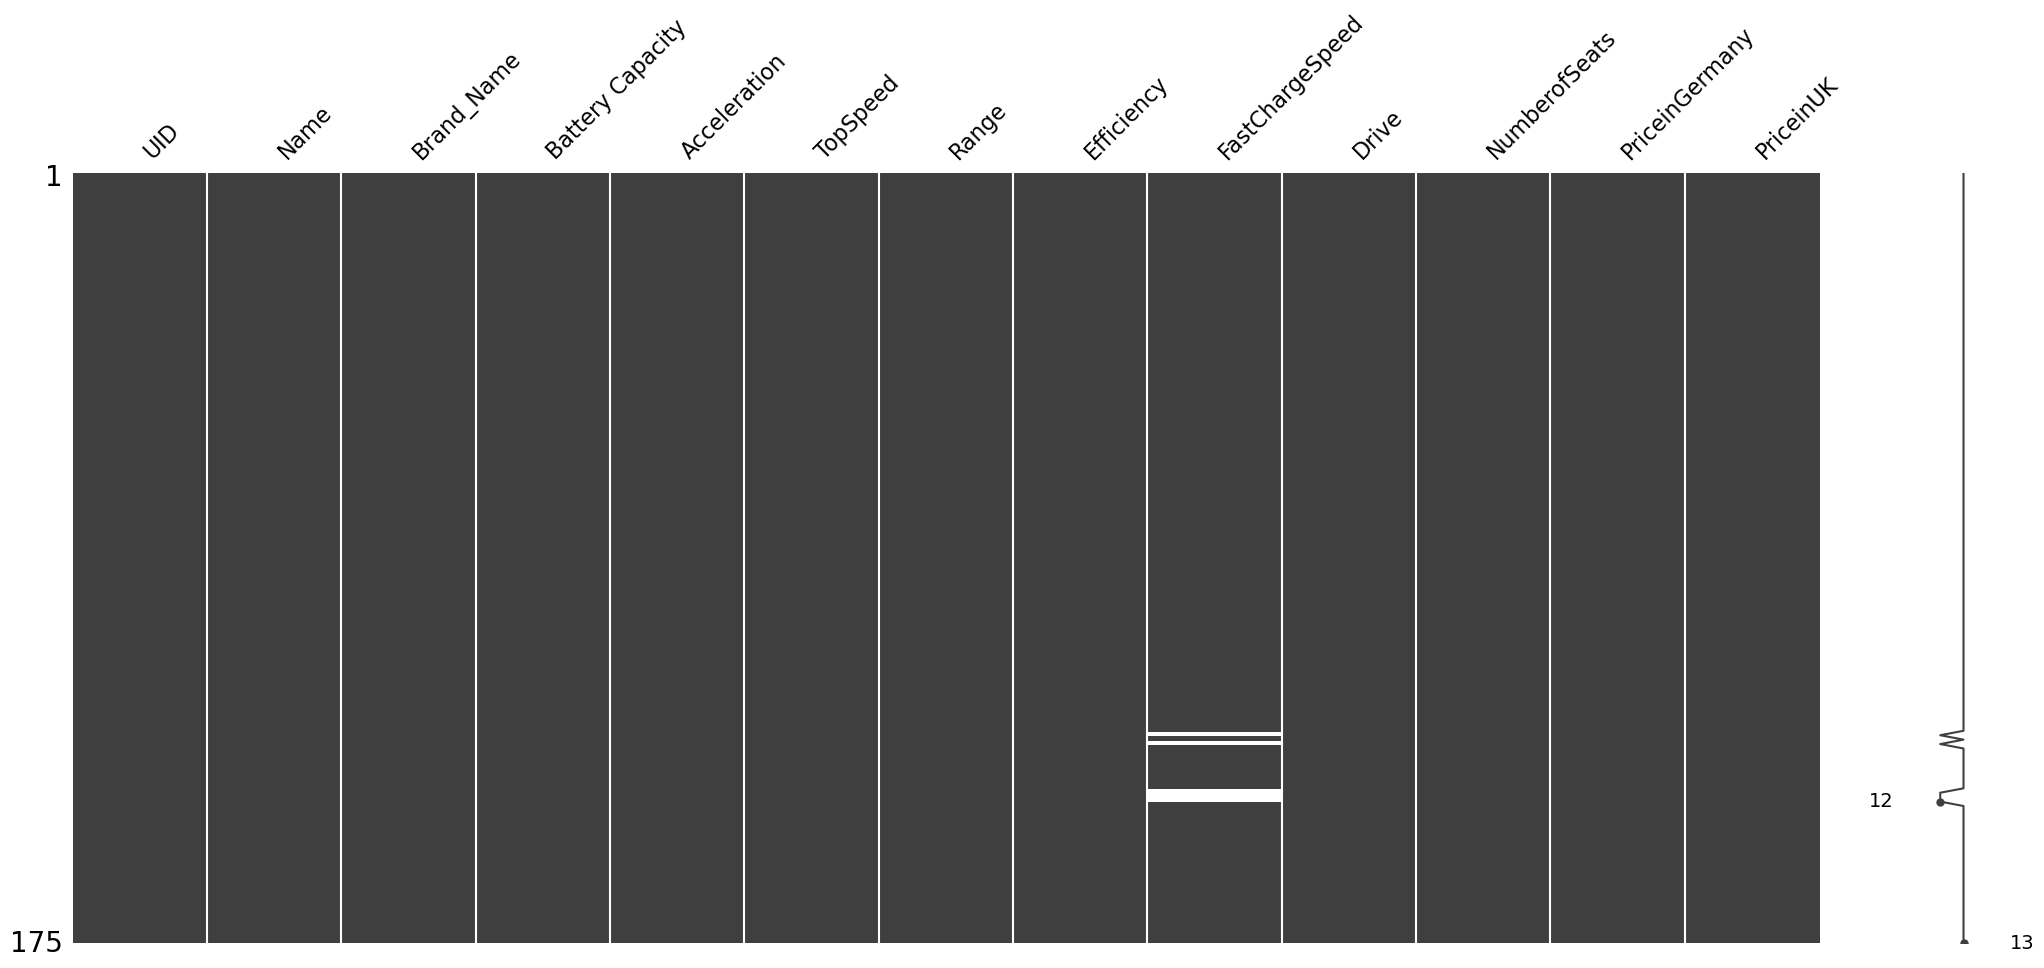

In [78]:
msno.matrix(df)

In [87]:
df=df[(df.PriceinGermany.notnull()) | (df.PriceinUK.notnull())]

In [86]:
df.shape

(175, 13)

<AxesSubplot:>

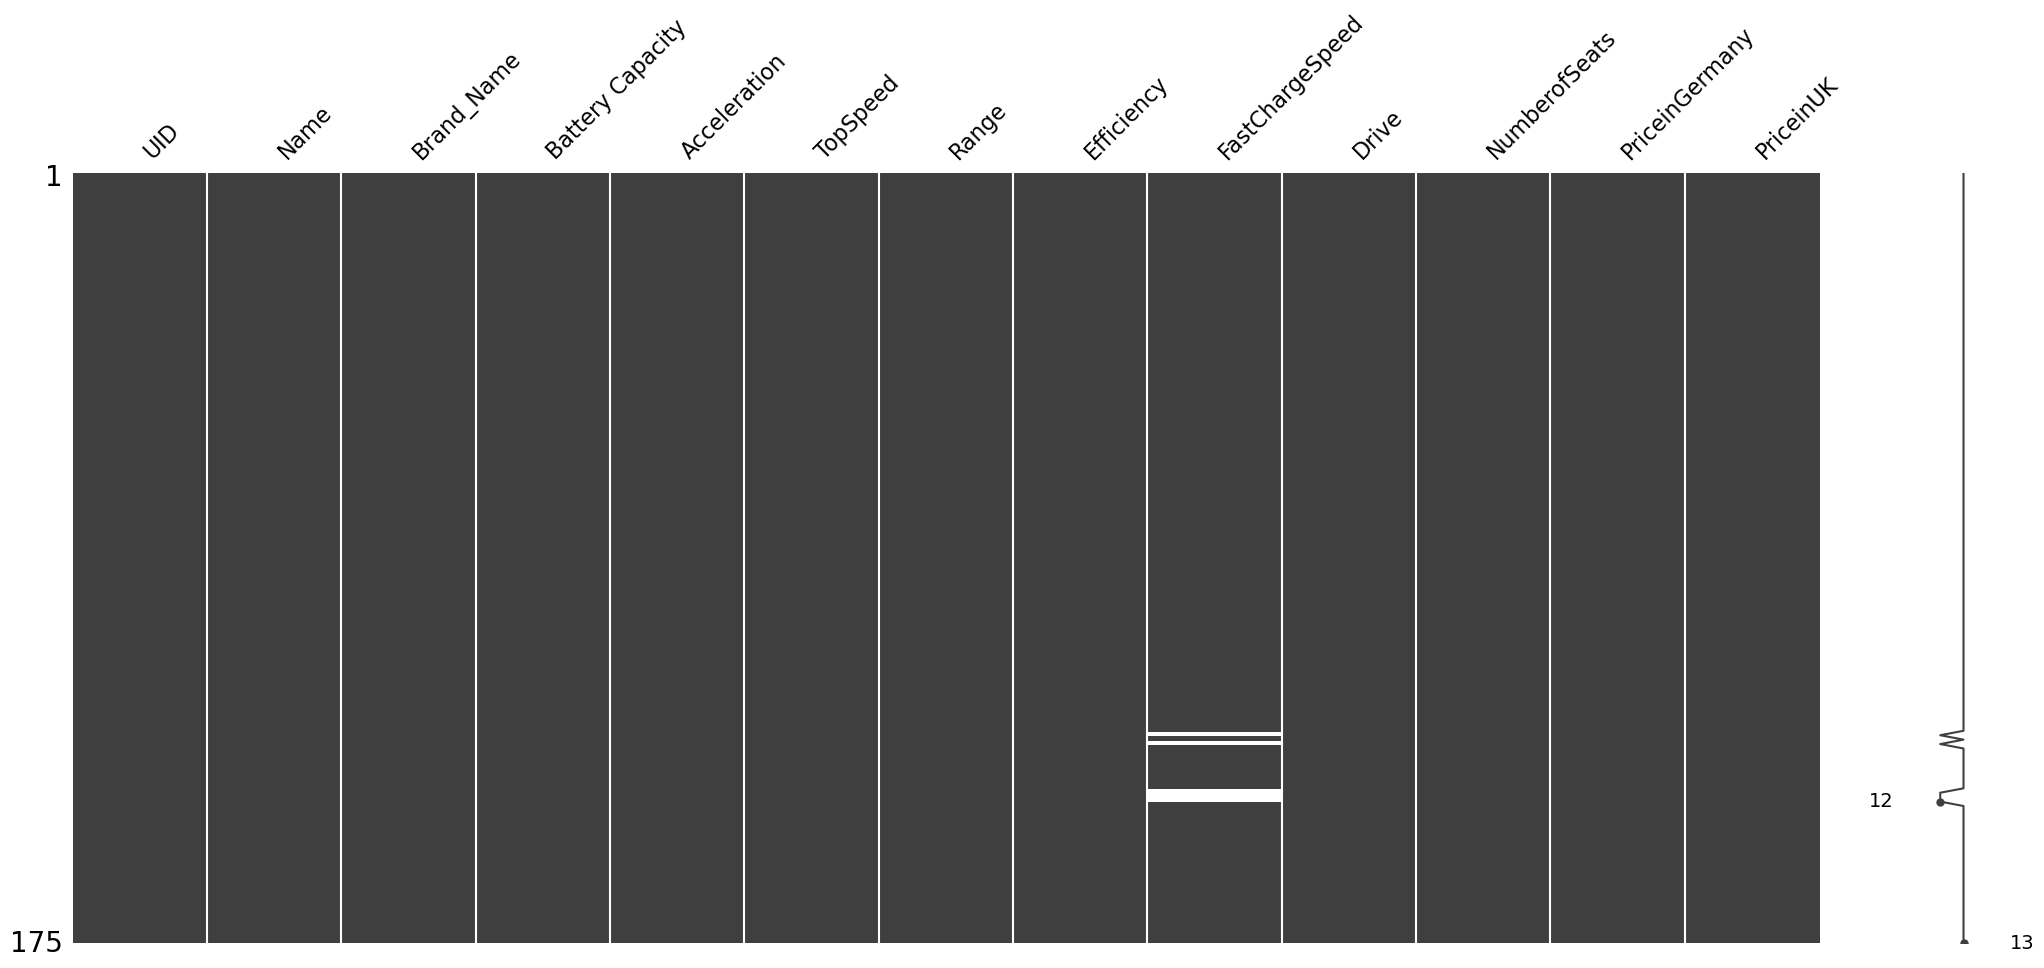

In [81]:
msno.matrix(df)

In [88]:
df.FastChargeSpeed =df.FastChargeSpeed.fillna(0)

In [89]:
df.corr()

,Battery Capacity,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,NumberofSeats,PriceinGermany,PriceinUK
Battery Capacity,1.000000,-0.619470,0.689804,0.892260,0.345705,0.656968,0.136024,0.627944,0.642619
Acceleration,-0.619470,1.000000,-0.820251,-0.712065,0.157551,-0.740878,0.318960,-0.525272,-0.695666
TopSpeed,0.689804,-0.820251,1.000000,0.761700,-0.061426,0.772357,-0.243177,0.702608,0.812543
Range,0.892260,-0.712065,0.761700,1.000000,-0.078438,0.769919,-0.068508,0.590116,0.639448
Efficiency,0.345705,0.157551,-0.061426,-0.078438,1.000000,-0.078785,0.612157,0.259047,0.085230
FastChargeSpeed,0.656968,-0.740878,0.772357,0.769919,-0.078785,1.000000,-0.121208,0.613346,0.661909
NumberofSeats,0.136024,0.318960,-0.243177,-0.068508,0.612157,-0.121208,1.000000,-0.018465,-0.222444
PriceinGermany,0.627944,-0.525272,0.702608,0.590116,0.259047,0.613346,-0.018465,1.000000,0.758770
PriceinUK,0.642619,-0.695666,0.812543,0.639448,0.085230,0.661909,-0.222444,0.758770,1.000000


<AxesSubplot:>

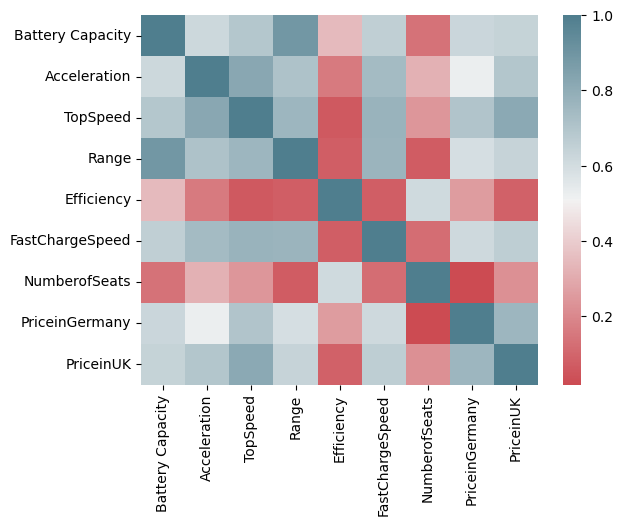

In [90]:
sns.heatmap(abs(df.corr()),cmap=sns.diverging_palette(10, 220, s=60, as_cmap=True))

<AxesSubplot:>

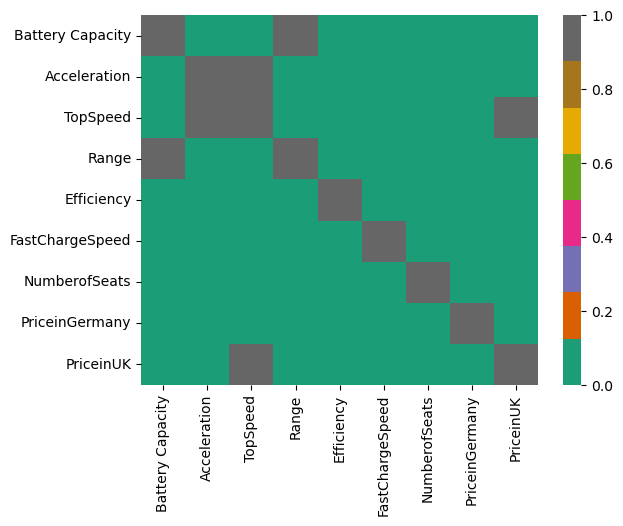

In [92]:
sns.heatmap(abs(df.corr())>0.8,cmap='Dark2')

In [93]:
df_Acceleration = df.Acceleration
df=df.drop(columns=['Acceleration','Battery Capacity'])
df.head()

,UID,Name,Brand_Name,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Aiways U5 Battery Electric Vehicle | 63 kWh,Aiways U5,Aiways,150.0,335.0,188.0,350.0,Front Wheel Drive,5,35993,0
1,Audi Q4 Sportback e-tron 35Battery Electric Vehicle | 51.5 kWh,Audi Q4 Sportback e-tron 35,Audi,160.0,295.0,175.0,410.0,Rear Wheel Drive,5,43900,42250
2,Audi Q4 Sportback e-tron 40Battery Electric Vehicle | 76.6 kWh,Audi Q4 Sportback e-tron 40,Audi,160.0,425.0,180.0,520.0,Rear Wheel Drive,5,49500,0
3,Audi Q4 Sportback e-tron 50 quattroBattery Electric Vehicle | 76.6 kWh,Audi Q4 Sportback e-tron 50 quattro,Audi,180.0,400.0,192.0,490.0,All Wheel Drive,5,55600,52870
4,Audi Q4 e-tron 35Battery Electric Vehicle | 51.5 kWh,Audi Q4 e-tron 35,Audi,160.0,280.0,184.0,390.0,Rear Wheel Drive,5,41900,40750


<AxesSubplot:>

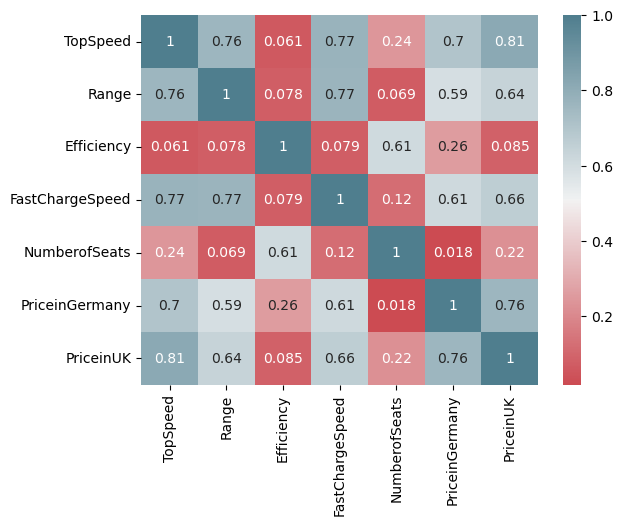

In [94]:
sns.heatmap(abs(df.corr()),cmap=sns.diverging_palette(10, 220, s=60, as_cmap=True),annot=True)

In [95]:
import matplotlib.pyplot as plt

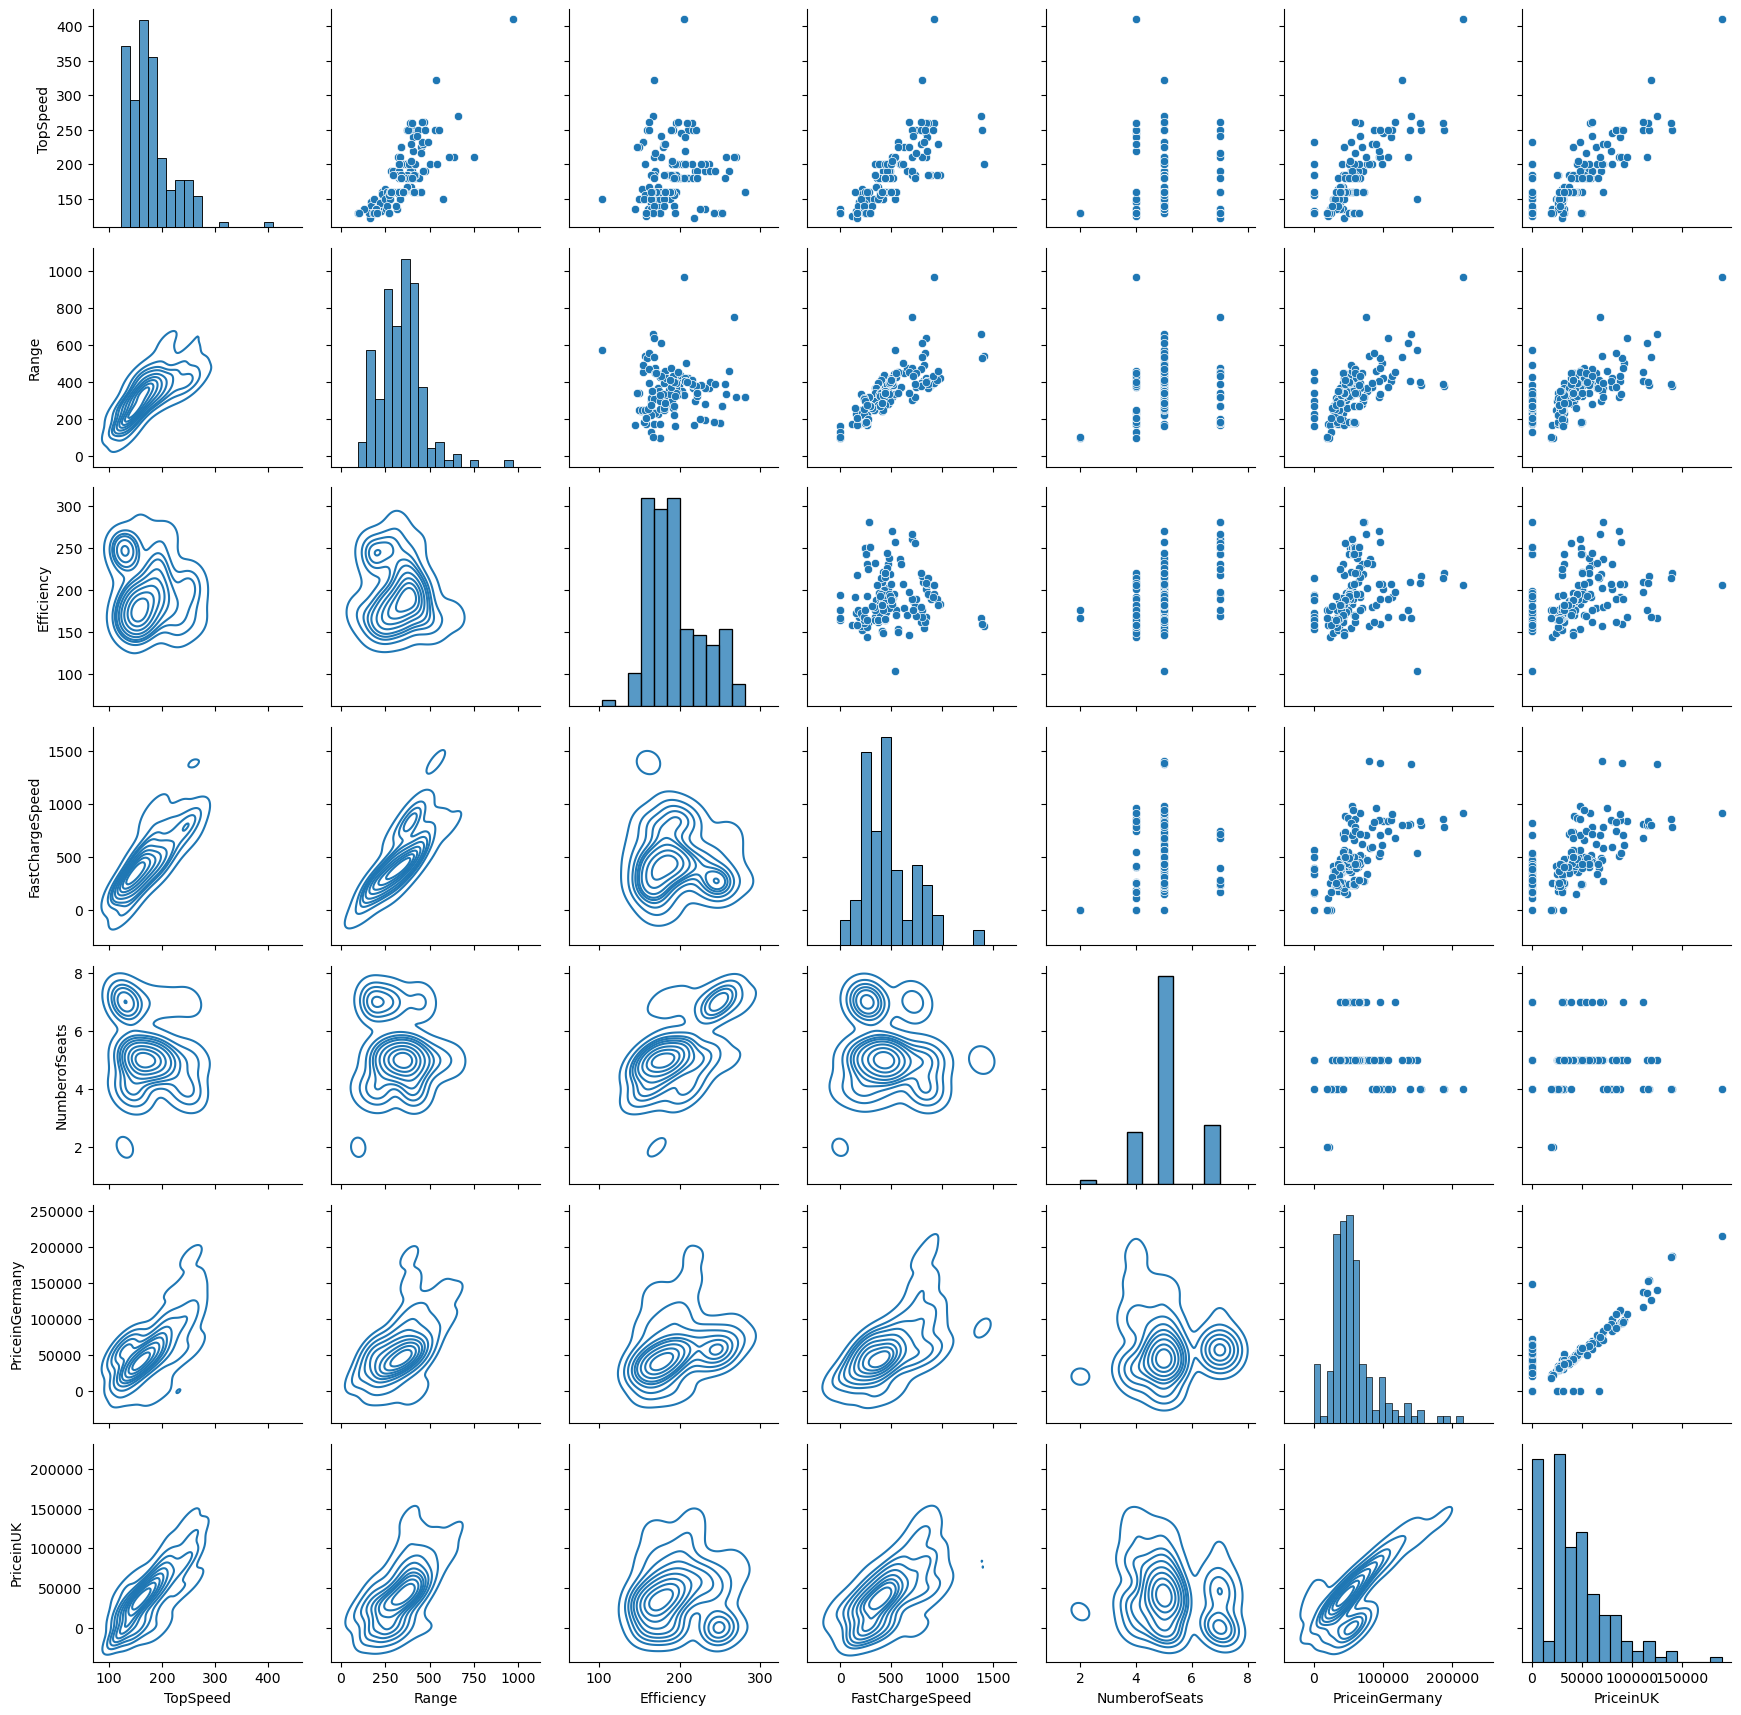

In [96]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

[]

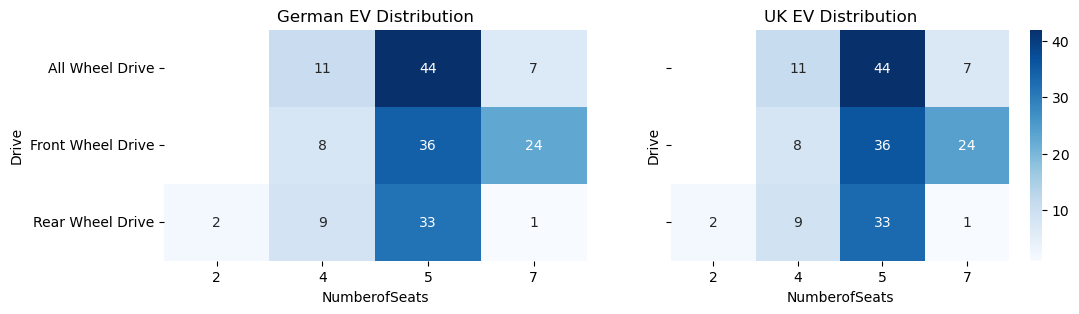

In [97]:
fig,ax = plt.subplots(1,2,figsize=(12,3),sharey=True)
sns.heatmap(df.pivot_table('PriceinGermany','Drive','NumberofSeats',aggfunc='count'),cmap='Blues',annot=True,ax=ax[0],cbar=False,)
ax[0].title.set_text('German EV Distribution')
sns.heatmap(df.pivot_table('PriceinUK','Drive','NumberofSeats',aggfunc='count'),cmap='Blues',annot=True,ax=ax[1],vmax=42,)
ax[1].title.set_text('UK EV Distribution')
plt.plot()

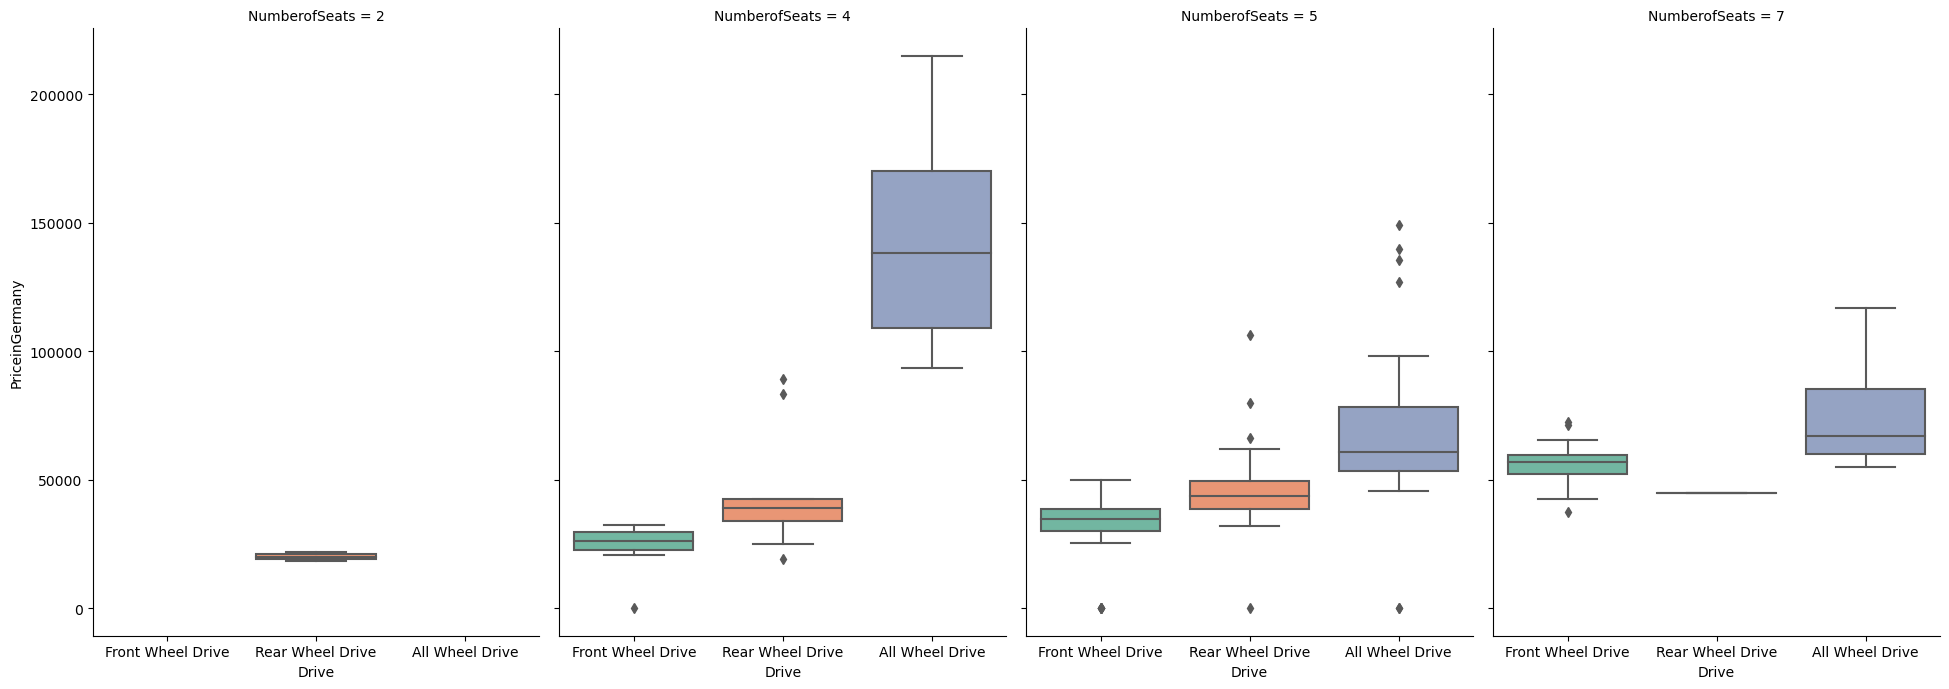

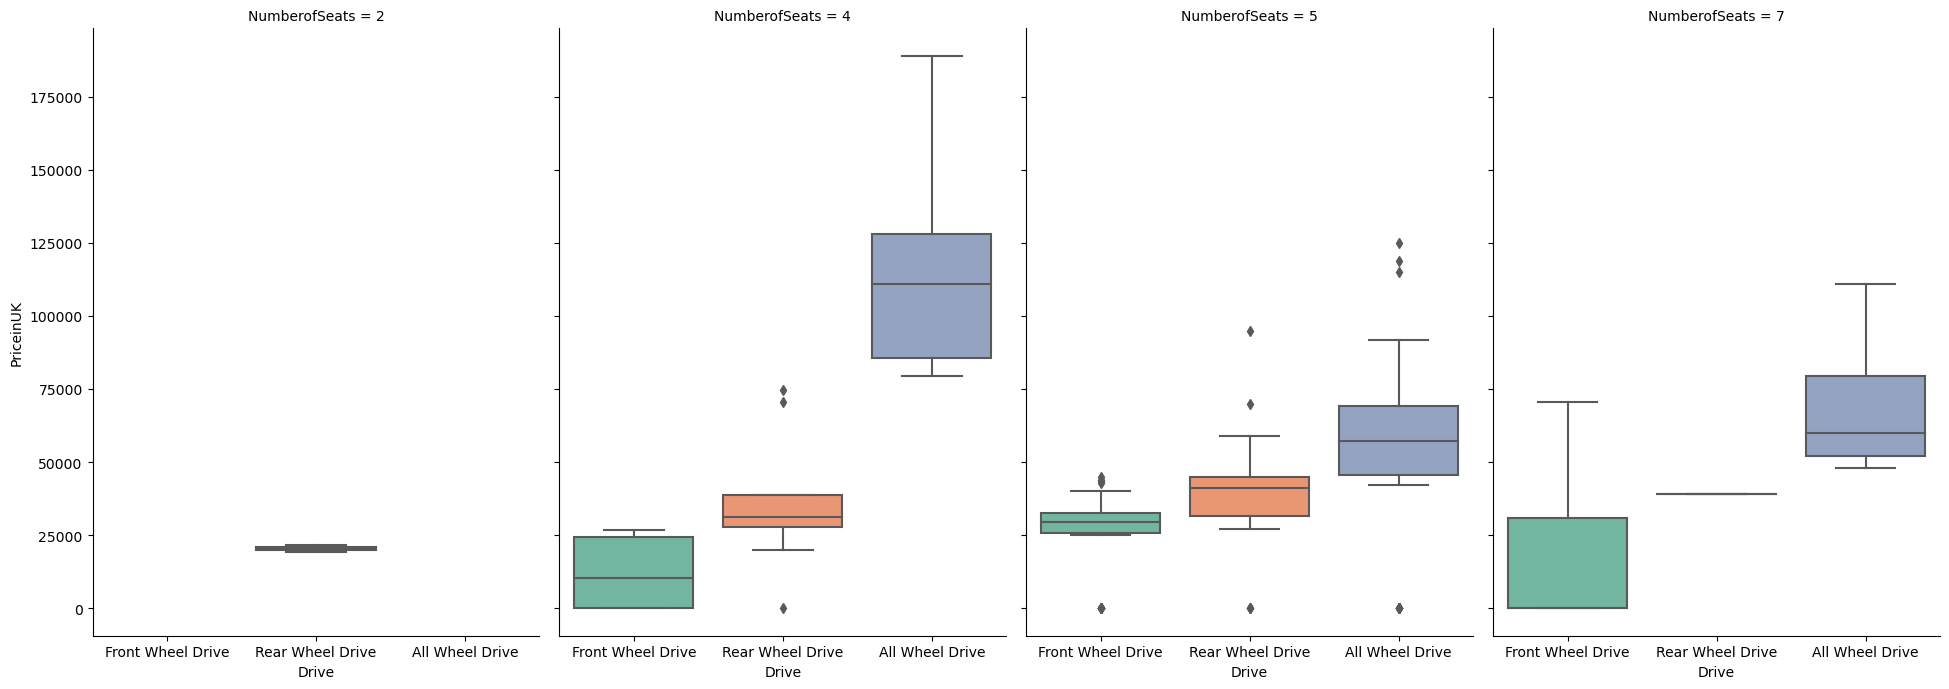

In [98]:
#import matplotlib.pyplot as plt
#fig,ax[9] = plt.subplot(333)


sns.catplot(data=df,y='PriceinGermany',x='Drive',col='NumberofSeats',kind='box',height=7,aspect=0.7,palette='Set2')
            #fig.plot()
sns.catplot(data=df,y='PriceinUK',x='Drive',col='NumberofSeats',kind='box',height=7,aspect=0.7,palette='Set2')
            #fig.plot()

In [99]:
df.head()

,UID,Name,Brand_Name,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Aiways U5 Battery Electric Vehicle | 63 kWh,Aiways U5,Aiways,150.0,335.0,188.0,350.0,Front Wheel Drive,5,35993,0
1,Audi Q4 Sportback e-tron 35Battery Electric Vehicle | 51.5 kWh,Audi Q4 Sportback e-tron 35,Audi,160.0,295.0,175.0,410.0,Rear Wheel Drive,5,43900,42250
2,Audi Q4 Sportback e-tron 40Battery Electric Vehicle | 76.6 kWh,Audi Q4 Sportback e-tron 40,Audi,160.0,425.0,180.0,520.0,Rear Wheel Drive,5,49500,0
3,Audi Q4 Sportback e-tron 50 quattroBattery Electric Vehicle | 76.6 kWh,Audi Q4 Sportback e-tron 50 quattro,Audi,180.0,400.0,192.0,490.0,All Wheel Drive,5,55600,52870
4,Audi Q4 e-tron 35Battery Electric Vehicle | 51.5 kWh,Audi Q4 e-tron 35,Audi,160.0,280.0,184.0,390.0,Rear Wheel Drive,5,41900,40750


In [100]:
df_Germany = df.drop(columns='PriceinUK').dropna()
df_Germany['Country'] = 'Germany'
df_Germany.rename(columns={'PriceinGermany':'Price'},inplace=True)

df_UK = df.drop(columns='PriceinGermany').dropna()
df_UK['Country'] = 'UK'
df_UK.rename(columns={'PriceinUK':'Price'},inplace=True)

In [101]:
print(df_Germany.shape)
print(df_UK.shape)

(175, 11)
(175, 11)


In [102]:
df_box= pd.DataFrame(columns=['Brand_Name','Country','Price'])
df_box =df_box.append(df_UK[['Brand_Name','Country','Price']])
df_box =df_box.append(df_Germany[['Brand_Name','Country','Price']])
df_box = df_box.sort_values(by='Price' ,ascending=False)

C:\Users\Mustafa\AppData\Local\Temp\ipykernel_29220\1421565749.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_box =df_box.append(df_UK[['Brand_Name','Country','Price']])
C:\Users\Mustafa\AppData\Local\Temp\ipykernel_29220\1421565749.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_box =df_box.append(df_Germany[['Brand_Name','Country','Price']])


In [103]:
df_box.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 158 to 0
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Brand_Name  350 non-null    object
 1   Country     350 non-null    object
 2   Price       350 non-null    object
dtypes: object(3)
memory usage: 10.9+ KB


In [104]:
df_box=df_box.groupby(by='Brand_Name').filter(lambda x: len(x) >10)

C:\Users\Mustafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price', ylabel='Brand_Name'>

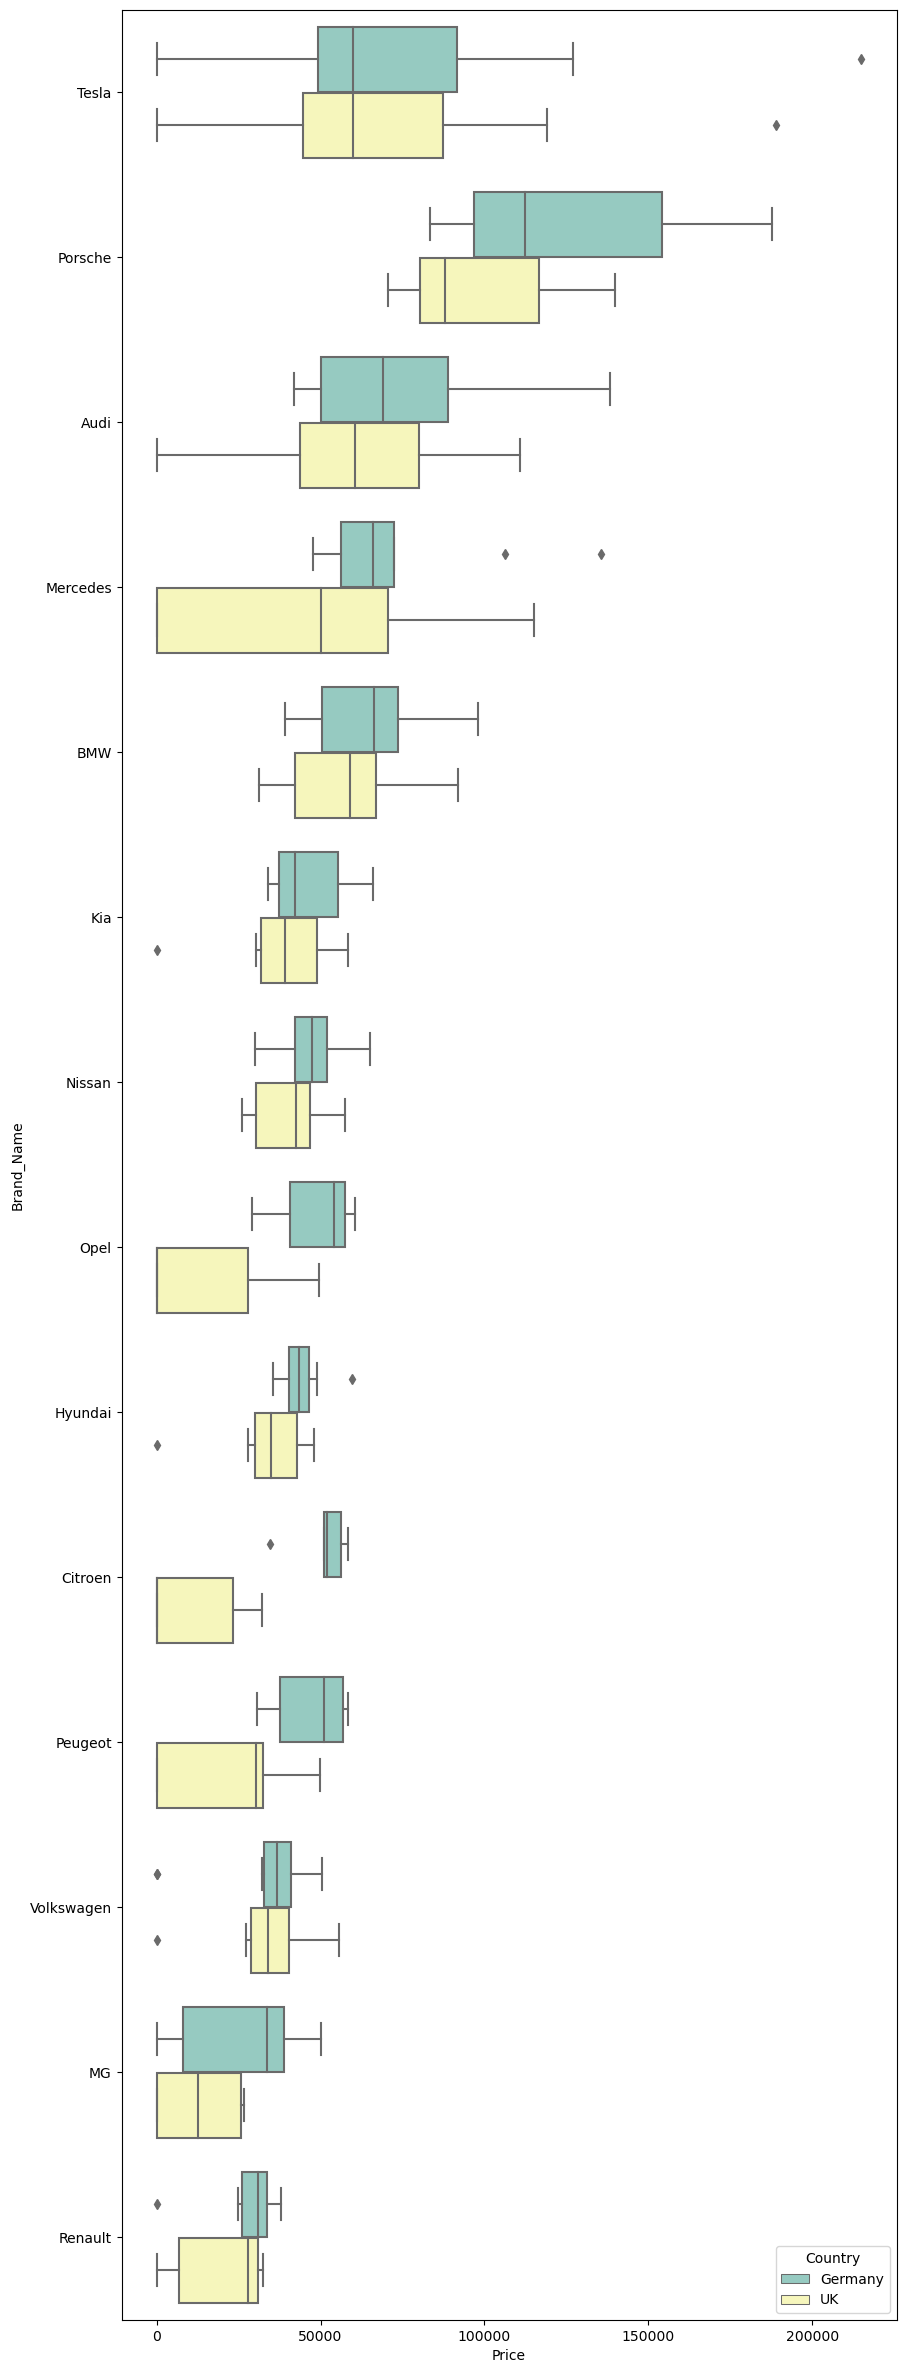

In [105]:
f,ax= plt.subplots(1,1,figsize=(10,30),sharey=True)
sns.boxplot('Price','Brand_Name',data=df_box,hue='Country',ax=ax,palette='Set3')

In [106]:
df.head()

,UID,Name,Brand_Name,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Aiways U5 Battery Electric Vehicle | 63 kWh,Aiways U5,Aiways,150.0,335.0,188.0,350.0,Front Wheel Drive,5,35993,0
1,Audi Q4 Sportback e-tron 35Battery Electric Vehicle | 51.5 kWh,Audi Q4 Sportback e-tron 35,Audi,160.0,295.0,175.0,410.0,Rear Wheel Drive,5,43900,42250
2,Audi Q4 Sportback e-tron 40Battery Electric Vehicle | 76.6 kWh,Audi Q4 Sportback e-tron 40,Audi,160.0,425.0,180.0,520.0,Rear Wheel Drive,5,49500,0
3,Audi Q4 Sportback e-tron 50 quattroBattery Electric Vehicle | 76.6 kWh,Audi Q4 Sportback e-tron 50 quattro,Audi,180.0,400.0,192.0,490.0,All Wheel Drive,5,55600,52870
4,Audi Q4 e-tron 35Battery Electric Vehicle | 51.5 kWh,Audi Q4 e-tron 35,Audi,160.0,280.0,184.0,390.0,Rear Wheel Drive,5,41900,40750


<AxesSubplot:xlabel='Efficiency', ylabel='PriceinUK'>

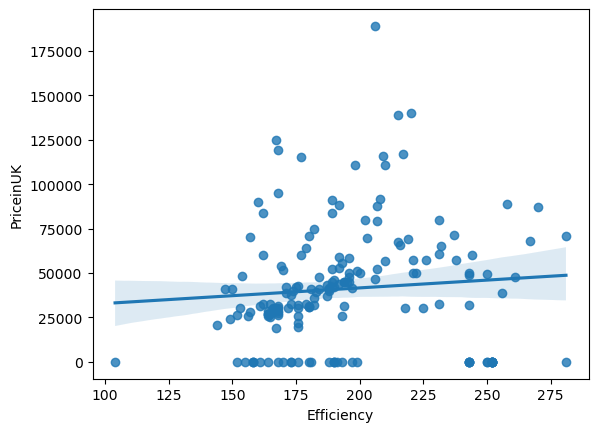

In [107]:
sns.regplot(data=df,x='Efficiency',y='PriceinUK',)

In [108]:
import statsmodels.formula.api as smf

In [109]:
summaryU = smf.ols('PriceinUK ~ Efficiency', data = df).fit().summary()
summaryG = smf.ols('PriceinGermany ~ Efficiency', data = df).fit().summary()

In [110]:
print(smf.ols('PriceinUK ~ Efficiency', data = df,).fit().summary())

                            OLS Regression Results                            
Dep. Variable:              PriceinUK   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.266
Date:                Sat, 01 Jul 2023   Prob (F-statistic):              0.262
Time:                        00:37:27   Log-Likelihood:                -2070.8
No. Observations:                 175   AIC:                             4146.
Df Residuals:                     173   BIC:                             4152.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.41e+04   1.54e+04      1.570      0.1

In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
dfUK=df[df.PriceinUK.notnull()]
dfDE=df[df.PriceinGermany.notnull()]

In [113]:
modelUK=LinearRegression()
modelDE=LinearRegression()

modelUK.fit(X=dfUK.Efficiency.to_numpy().reshape(-1,1),y=dfUK.PriceinUK.to_numpy().reshape(-1,1))
modelDE.fit(X=dfDE.Efficiency.to_numpy().reshape(-1,1),y=dfDE.PriceinGermany.to_numpy().reshape(-1,1))

LinearRegression()

In [114]:
modelUK.rank_

1

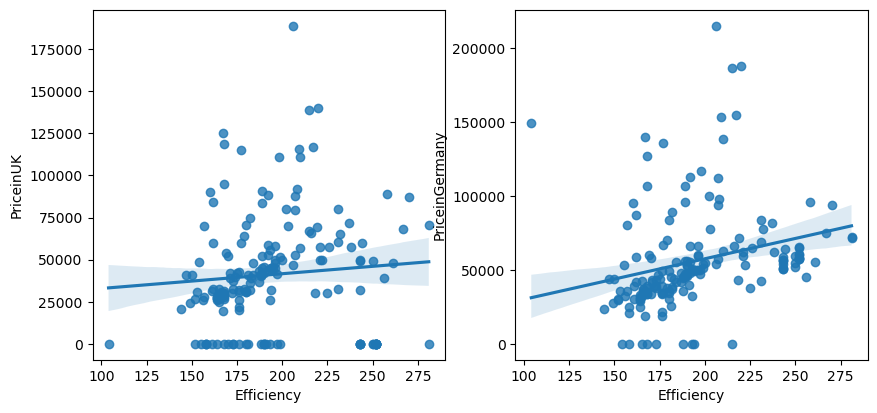

In [115]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(10,10))
ax1 = f.add_subplot(2,2,1)
p1 = sns.regplot(data=df,x='Efficiency',y='PriceinUK',ax=ax1)
ax2 = f.add_subplot(2,2,2)
p2 = sns.regplot(data=df,x='Efficiency',y='PriceinGermany',ax=ax2)

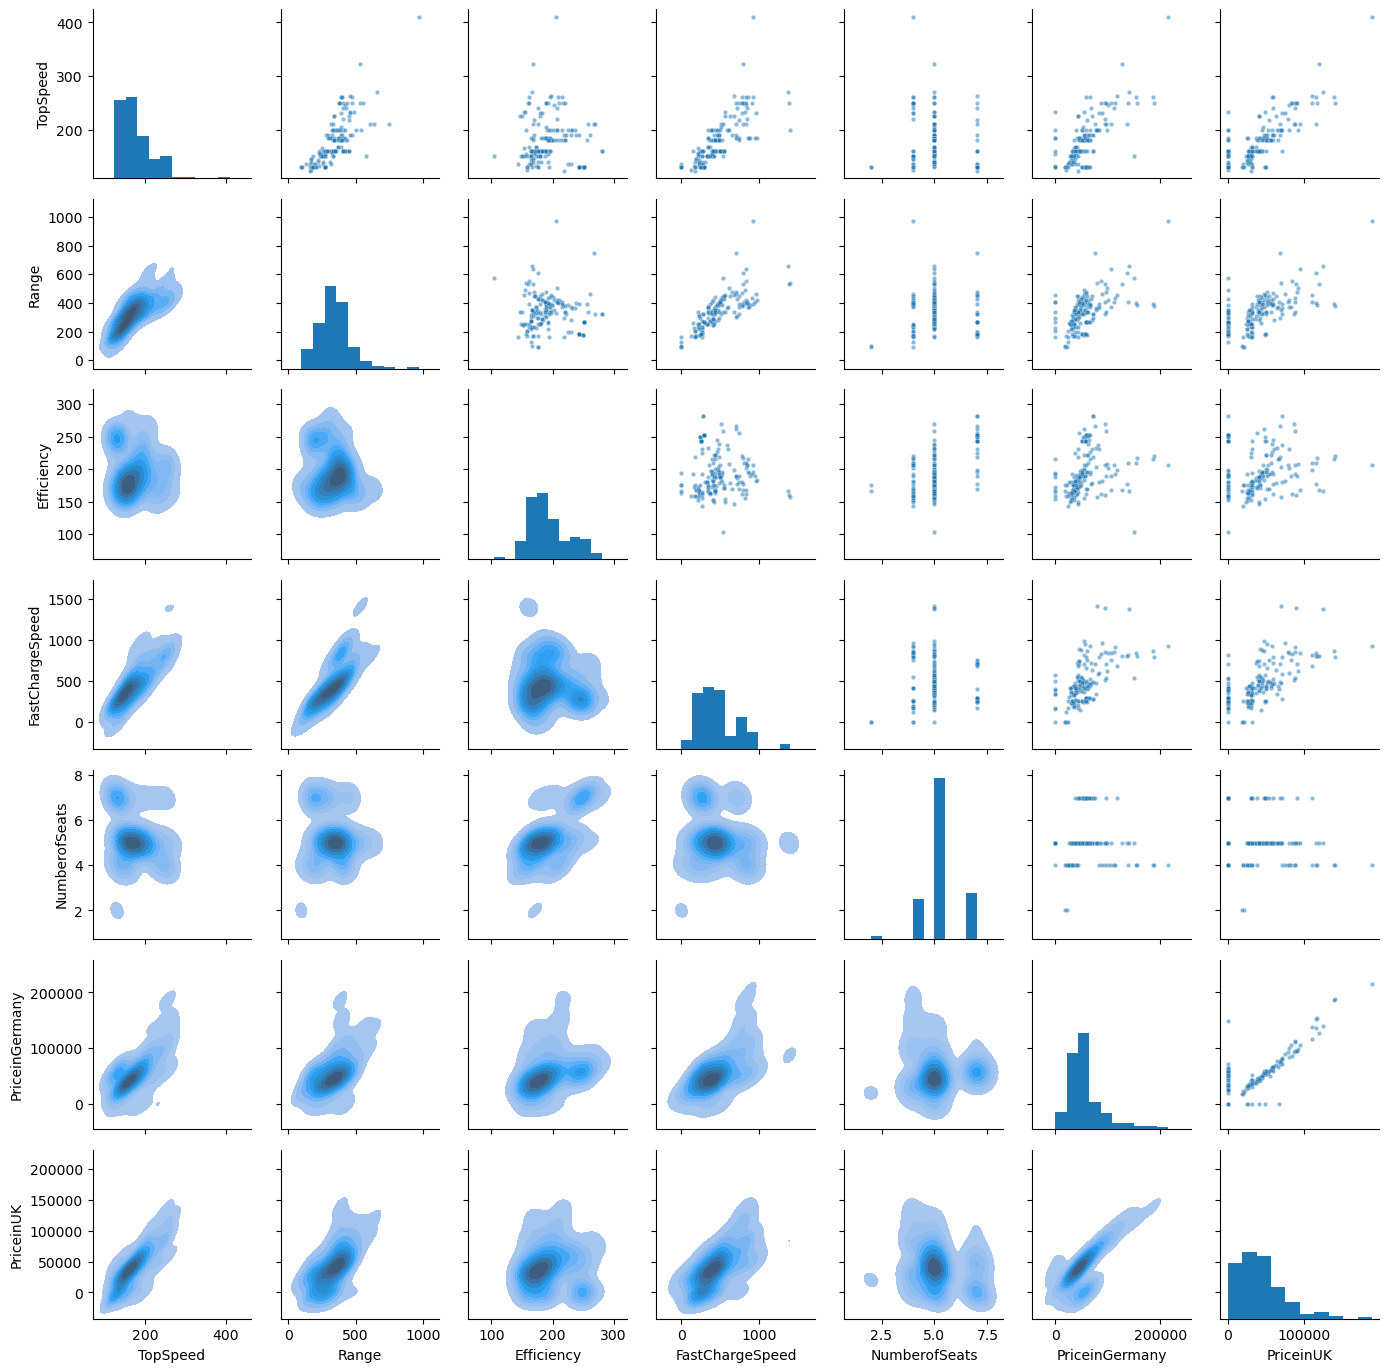

In [116]:
g=sns.PairGrid(data=dfUK,height=2,aspect=1)
g.map_upper(sns.scatterplot, linewidths = 1, edgecolor = 'w', s = 10, alpha = 0.5)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot,shade=True)